In [1]:
# import packages

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

#import dask.dataframe as dd
import pandas as pd # dataframe and analytics
import numpy as np # math 
import matplotlib.pyplot as plt # ploting
import seaborn as sns # bases on matplotlib for ploting

import os
import pymongo as pymongo
from pymongo import MongoClient
import pprint
import json

In [2]:
# creating an channel
channel  = MongoClient(port = 27017)

In [3]:
Select_db = channel.data

In [4]:
# Set collection name
Select_collection = Select_db.data

In [5]:
# Extract data from mongodb
# Create json file
cursor = Select_collection.find()

In [6]:
# Convert json into pandas
data_train = pd.DataFrame(list(cursor))

In [2]:
# read the data

In [4]:
#data_train = pd.read_csv('D:/AMOGH/train.csv/train.csv')

In [7]:
data_train.head()

,_id,comment_text,id,identity_hate,insult,obscene,severe_toxic,threat,toxic
0,5af0818461828809cc285b2c,"""\n Possibly unfree Image:Obi-sash.jpg \n An ...",0d91b8a6adfaf405,0,0,0,0,0,0
1,5af0818461828809cc285b2d,Edits that people don't agree with aren't vand...,0a58be3e6eb12b9a,0,0,0,0,0,0
2,5af0818461828809cc285b2e,WP:ANI#Do_admins_deserve_harrassment.3F\nThis ...,d2b1553bb4b4756d,0,0,0,0,0,0
3,5af0818461828809cc285b2f,""" Also, """"The Sun"""" is generally considered co...",9072da01a100159d,0,0,0,0,0,0
4,5af0818461828809cc285b30,"haiku \n\nI left you a haiku, just incase you ...",3d678e97e5b41d49,0,0,0,0,0,0


In [5]:
data_train.shape

(159571, 8)

In [6]:
data_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [7]:
data_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

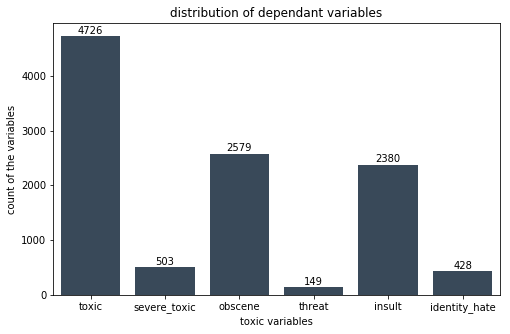

In [165]:
x = data_train.iloc[:,2:8].sum()

sns.color_palette("deep", 10)
plt.figure(figsize=(8,5))
pat = sns.barplot(x.index,x.values,color="#34495e")
plt.xlabel('toxic variables')
plt.ylabel('count of the variables')
plt.title('distribution of dependant variables')


# lables
rects = pat.patches
labels =x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    pat.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.show()    


bivariant analysis
 
cross tab - to find the relation between the dependant variables



In [14]:
data_t = data_train.iloc[:,2:]
main_col = 'toxic'
corr_mats = []
for i in data_t.columns[1:]:
    confusion_matrix = pd.crosstab(data_t[main_col],data_t[i])
    corr_mats.append(confusion_matrix)
    
out = pd.concat(corr_mats,axis = 1,keys=data_t[1:])
out

toxic       severe_toxic       obscene       threat        \
severe_toxic       0     1            0     1       0    1       0     1   
toxic                                                                      
0             144277     0       143754   523  144248   29  143744   533   
1              13699  1595         7368  7926   14845  449    7950  7344   

              insult        
severe_toxic       0     1  
toxic                       
0             144174   103  
1              13992  1302

from the above we can see that 

severe_toxic is toxic
toxic column has influence on other columns like obscene and threat

In [ ]:
x = data_train.iloc[:,2:].rowsum()

plt.figure(figsize=(10,8))
pat = sns.barplot(x.index,x.values)
plt.xlabel('toxic variables')
plt.ylabel('count of the variables')
plt.title('distribution of dependant variables')


# lables
rects = pat.patches
labels =x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    pat.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.show()    

In [31]:
x = data_train.iloc[:,2:]

In [33]:
x['sum'] = x.sum(axis=1)

In [38]:
x = x['sum'].value_counts()

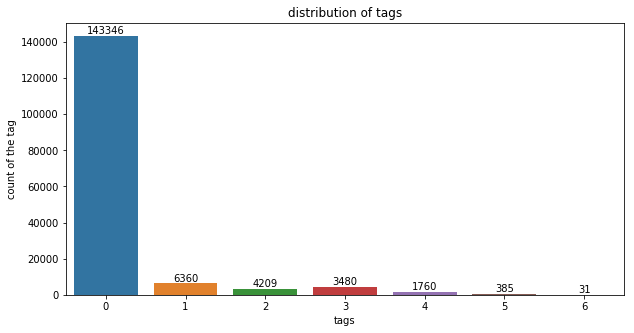

In [44]:
# multiple class tags

plt.figure(figsize=(10,5))
pat = sns.barplot(x.index,x.values)
plt.xlabel('tags')
plt.ylabel('count of the tag')
plt.title('distribution of tags')


# lables
rects = pat.patches
labels =x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    pat.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.show()    


tag with 1 is more followed by tag 2 and 3 least is 6 which is sum of all the tags 
Here 0 means no tag 

In [34]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
# some ideas for feature engineering 

In [47]:
data_train[data_train['toxic'] == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,"Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...",1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming back! Tosser.",1,0,0,0,0,0
42,001810bf8c45bf5f,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!",1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
44,001956c382006abd,"I'm Sorry \n\nI'm sorry I screwed around with someones talk page. It was very bad to do. I know how having the templates on their talk page helps you assert your dominance over them. I know I should bow down to the almighty administrators. But then again, I'm going to go play outside....with your mom. 76.122.79.82",1,0,0,0,0,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP. I'M FUCKED UP RIGHT NOW!,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He loves an arm up his ass.,1,0,1,0,1,0
58,0021fe88bc4da3e6,"My Band Page's deletion. You thought I was gone. \n\nDeleting the comment I posted on your 'talk page' does not delete my feelings for your hasty decision to delete my page. You, sir, are still a cock-sucking douche fuck. Sit back for a second and think about what your life has become. ............ Done? That didn't take long did it? Nope. Because, as I am most certainly aware, your life is a shitstorm of sitting in front of the computer masturbating to fictional creatures. Your attempts to get rid of me are mediocre at best. You are constantly sucking the dick of failure. You don't want a personal attack, huh? Well, too bad, Fuckcock McDickerson. You've got one. From me. You can go ahead and delete my profile from wikipedia. I'll just make another one and come right back to 'Syrthiss's talk page and insult the dick off of you. How could you shatter the dreams of an innocent eighteen year old college freshman trying to make a name for his band. Does that make you happy? Fucking with people because you're an overweight, single, old man in a dead-end job. Did you spot that perhaps someone else was going to follow his dreams and you were trying to hold him back so somebody else could suffer like you? Yes you did. I don't make empty threats, so I won't be saying anything along the lines of 'i'll hurt you' or 'i'll eat the children from within your sister's womb', but I will say that you are a asshole, son-of-a-bitch, mother fucking cock sucker. So, go eat some more food and drown your sorrows you premature ejaculating, bald headed fuck.\n\nYou should do something nice for yourself, maybe go grab a couple of Horny Goat Weeds from your local convenience store and jack off for a little longer than three minutes tonight.\n\nSincerely,\nAn Asshole That's Better Than You In Every Way.",1,0,1,0,0,0


we can see that for toxic tag comments words are written in capital, puntuation, question marks , ! 
length of the sentence may matter 
lenght of the words may matter ( angry people may write few words)

In [ ]:
# number of symbols

In [ ]:
# one more feature that we can create is off ip address there are ip address for few of the text comments 

In [ ]:
# number of unique words
# propostion of unique words


In [7]:
import re

In [8]:
import nltk

In [9]:
data = nltk.Text(data_train['comment_text'])

In [10]:
from nltk.corpus import stopwords
stopwords =  set(stopwords.words('english'))

In [8]:
data = []
data1 = []
for i in data_train['comment_text']:
    data1 = re.sub('\n','',i)
    data.append(data1)
    

In [9]:
data[0].split()[-1]

'now.89.205.38.27'

In [12]:
ip = []
for i in data:
    ip.append(re.findall(r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b',i))

In [13]:
da =[]
for i in ip:
    if i == []:
        da.append(['0'])
    if i != []:
        da.append(i)
        
    

In [14]:
len(da)

159571

In [16]:
data_train['ip'] = ip

In [17]:
data_train['ip'] = data_train['ip'].apply(' '.join)

In [18]:
len(data_train['ip'].unique())

5376

In [31]:
#data_train[data_train['toxic'] ==1]

In [8]:
data_train.shape

(159571, 8)

In [9]:
data_train = data_train.sample(30000)

In [17]:
# Convert dataframe into json format
#NewData_json = json.loads(data_train.T.to_json()).values()
# Insert new json into mongo
#Select_db.data.insert(NewData_json)

#Collection_Names = Select_db.collection_names(include_system_collections = False)

In [18]:
Collection_Names = Select_db.collection_names(include_system_collections = False)

In [24]:
Select_collection = Select_db.data
# Extract first document
pprint.pprint(Select_collection.find_one())

{'_id': ObjectId('5af0818461828809cc285b2c'),
 'comment_text': '"\n'
                 ' Possibly unfree Image:Obi-sash.jpg \n'
                 '  An image that you uploaded or altered, Image:Obi-sash.jpg, '
                 'has been listed at Wikipedia:Possibly unfree images because '
                 "its copyright status is disputed. If the image's copyright "
                 'status cannot be verified, it may be deleted. Please go to '
                 'its page for more information if you are interested in it '
                 'not being deleted. Thank you.  (Talk) "',
 'id': '0d91b8a6adfaf405',
 'identity_hate': 0,
 'insult': 0,
 'obscene': 0,
 'severe_toxic': 0,
 'threat': 0,
 'toxic': 0}


In [11]:
data_train['data_capital'] = data_train['comment_text'].apply(lambda x : sum(1 for i in x if i.isupper()))

In [12]:
import string

In [13]:
data_train['data_puctuations'] = data_train['comment_text'].apply(lambda x : len([i for i in x if i in string.punctuation]))

In [14]:
data_train['data_quationmark'] = data_train['comment_text'].apply(lambda x :x.count('?'))

In [15]:
data_train['data_exclamation_marks'] = data_train['comment_text'].apply(lambda x :x.count('!'))

In [16]:
data_train['new_symbols'] = data_train['comment_text'].apply(lambda x :sum(x.count(w) for w in '*&$%'))

In [17]:
data_train['unique_words'] = data_train['comment_text'].apply(lambda comment : len(set(str(comment).split())))

In [18]:
data_train['words'] = data_train['comment_text'].apply(lambda comment : len(str(comment).split()))

In [19]:
data_train['unique_word_percentage'] = (data_train['unique_words']/data_train['words'])*100

In [20]:
data_train['puntuation_percentage'] = (data_train['data_puctuations']/data_train['words'])*100

In [21]:
data_train['sentence'] = data_train['comment_text'].apply(lambda comment: len(re.findall('\n',str(comment)))+1)

In [22]:
data_train['sum']= data_train.iloc[:,2:8].sum(axis=1)
data_train['sum']=data_train['sum'].apply(lambda x: 'toxic' if x >= 1 else 'clean')

In [23]:
data_train['stop_words'] = data_train['comment_text'].apply(lambda comment: len([i for i in str(comment).lower().split() if i in stopwords]))

In [24]:
from textblob import TextBlob

In [25]:
data_train['polarity'] = data_train['comment_text'].apply(lambda x : int(TextBlob(x).sentiment.polarity * 10))

In [26]:
zpolarity = {0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight',9:'nine',10:'ten'}
zsign = {-1:'negative',  0.: 'neutral', 1:'positive'}

In [27]:
data_train['comment_text'] = data_train.apply(lambda r: str(r['comment_text']) + ' polarity' +  zsign[np.sign(r['polarity'])] + zpolarity[np.abs(r['polarity'])], axis=1)

In [28]:
data_train['comment_text'].head()

0    "\n Possibly unfree Image:Obi-sash.jpg \n  An ...
1    Edits that people don't agree with aren't vand...
2    WP:ANI#Do_admins_deserve_harrassment.3F\nThis ...
3    " Also, ""The Sun"" is generally considered co...
4    haiku \n\nI left you a haiku, just incase you ...
Name: comment_text, dtype: object

Text(0.5,1,'! mark')

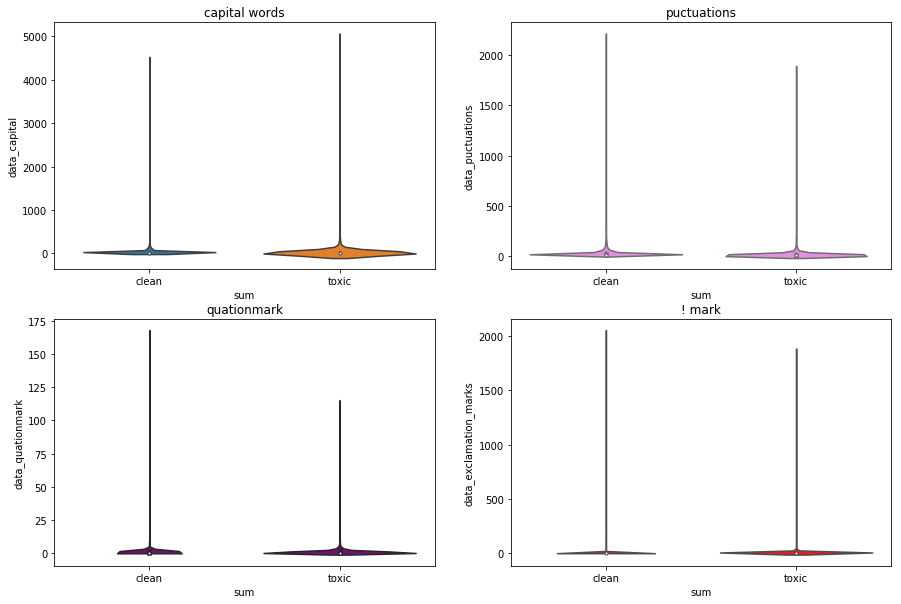

In [43]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('capital words')
sns.violinplot(y=data_train['data_capital'],x=data_train['sum'])

plt.subplot(222)
sns.violinplot(y=data_train['data_puctuations'],x=data_train['sum'],color='violet')
plt.title('puctuations')


plt.subplot(223)
sns.violinplot(y=data_train['data_quationmark'],x=data_train['sum'],color = 'purple')
plt.title('quationmark')

plt.subplot(224)
sns.violinplot(y=data_train['data_exclamation_marks'],x=data_train['sum'],color='red')
plt.title('! mark')  


In [ ]:
we can clearly see that there are lot more capital words in toxic and qutionmarks too
! mark may not be usefull due to the distribution
less punctuation in toxic

In [59]:
data_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'ip', 'data_capital', 'data_puctuations',
       'data_quationmark', 'data_exclamation_marks', 'new_symbols',
       'unique_words', 'words', 'unique_word_percentage',
       'puntuation_percentage', 'sentence'],
      dtype='object')

Text(0.5,1,'unique words')

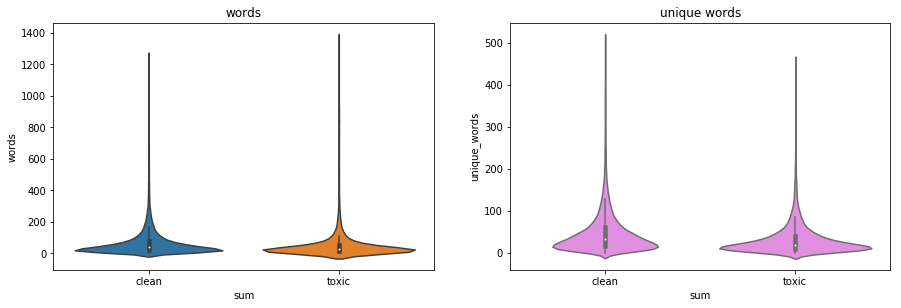

In [73]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('words')
sns.violinplot(y=data_train['words'],x=data_train['sum'])

plt.subplot(222)
sns.violinplot(y=data_train['unique_words'],x=data_train['sum'],color='violet')
plt.title('unique words')

In [ ]:
# less unique words in toxic, words look the same(may not be so useful)

In [76]:
data_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'data_capital', 'data_puctuations',
       'data_quationmark', 'data_exclamation_marks', 'new_symbols',
       'unique_words', 'words', 'unique_word_percentage',
       'puntuation_percentage', 'sentence', 'sum', 'stop_words', 'polarity',
       'data'],
      dtype='object')

In [32]:
col = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'data_capital', 'data_puctuations',
       'data_quationmark', 'data_exclamation_marks', 'new_symbols',
       'unique_words', 'words', 'unique_word_percentage',
       'puntuation_percentage', 'sentence', 'stop_words']

In [35]:
corr = data_train[col].corr()

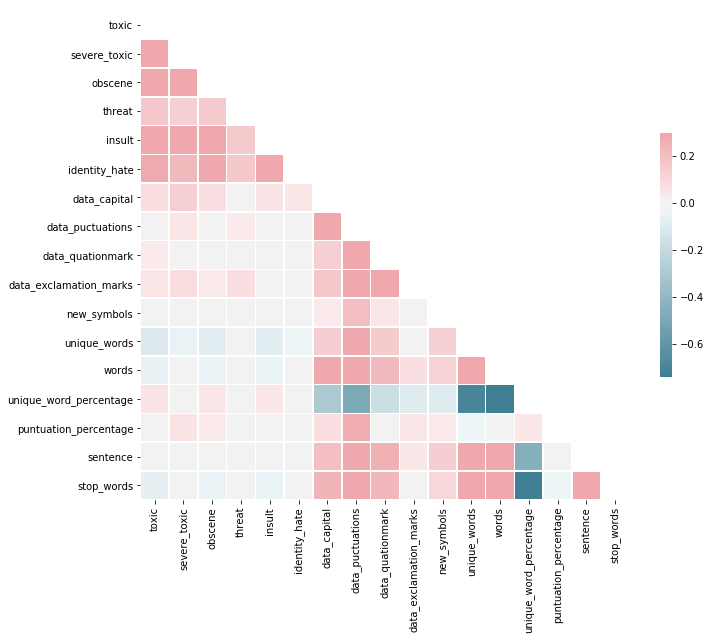

In [36]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

from the above plot we can see that capital words, number stop words,puntuation %,exclamation marks are helpfull on dependant variables

In [29]:
feature_columns = ['data_capital','data_puctuations',
       'data_quationmark', 'data_exclamation_marks', 'new_symbols',
         'unique_word_percentage', 'sentence', 'stop_words']

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
from sklearn.linear_model import LogisticRegression

In [116]:
l = LogisticRegression()

In [216]:
l.fit(data_train[feature_columns],data_train['severe_toxic'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [226]:
l.fit(data_train[feature_columns],data_train['identity_hate'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [217]:
importance = l.coef_

In [219]:
importance1= l.coef_

In [221]:
importance2= l.coef_

In [223]:
importance3= l.coef_

In [225]:
importance4= l.coef_

In [227]:
importance5= l.coef_

array([ 0.00041537,  0.00044398,  0.02473476,  0.00991063,  0.04636145,
       -0.03627704, -0.00032292, -0.03075226, -0.00267719,  0.007401  ])

Text(0.5,1,'identity_hate')

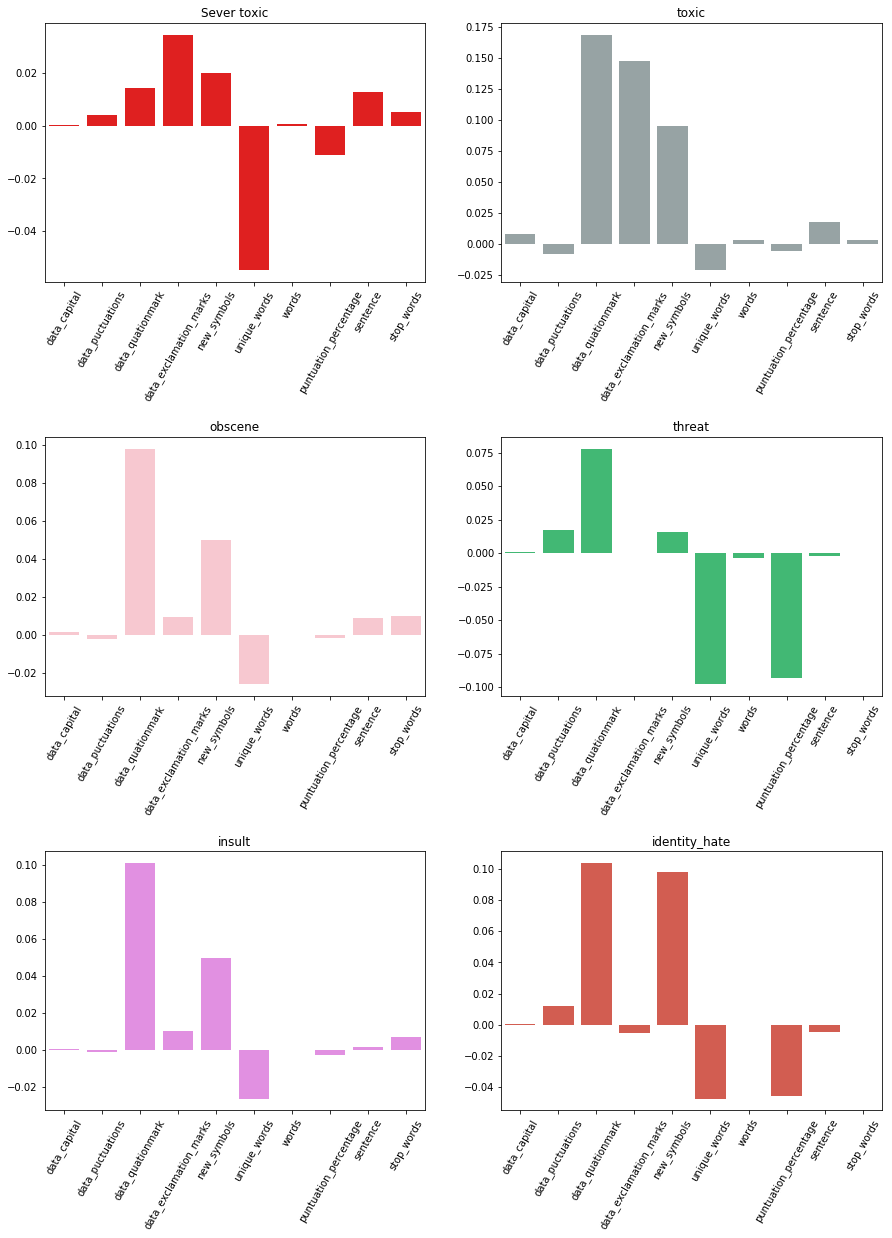

In [228]:
plt.figure(figsize=(15,20))

plt.subplot2grid((3,2),(0,0))
sns.barplot(feature_columns,importance[0],color='red')
plt.xticks(rotation =60)
plt.title('Sever toxic')


plt.subplots_adjust(hspace=0.6)
plt.subplot2grid((3,2),(0,1))
sns.barplot(feature_columns,importance1[0],color="#95a5a6")
plt.xticks(rotation =60)
plt.title('toxic')



plt.subplot2grid((3,2),(1,0))
sns.barplot(feature_columns,importance2[0],color='pink')
plt.xticks(rotation = 60)
plt.title('obscene')


plt.subplot2grid((3,2),(1,1))
sns.barplot(feature_columns,importance3[0],color="#2ecc71")
plt.xticks(rotation = 60)
plt.title('threat')

plt.subplot2grid((3,2),(2,0))
sns.barplot(feature_columns,importance4[0],color='violet')
plt.xticks(rotation = 60)
plt.title('insult')

plt.subplot2grid((3,2),(2,1))
sns.barplot(feature_columns,importance5[0],color="#e74c3c")
plt.xticks(rotation = 60)
plt.title('identity_hate')


In [ ]:
# text preprocessing 

In [30]:
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lemmentizer = WordNetLemmatizer()

In [31]:
stopwords.remove('off')

In [32]:
def train(name):
    
    text_name = nltk.Text(name)
    text_names = []
    for text in text_name:
        text_ = []
        text = text.lower()
        T = re.sub('\n','',text)
        text_.append(T)
        for i in text_:
            d = re.findall(r'[a-z]+',i)
            text_names.append(' '.join(d))
            
            
            
            
    word_tokenize = []
    full_word_sent =[]
    from nltk import wordpunct_tokenize
    for sentence in text_names:
        words =[]
        for word in wordpunct_tokenize(sentence):
            word_tokenize.append(word)
            words.append(word)
        full_word_sent.append(words)
            
            
    
    words_token =[]
    words = []
    for sent in full_word_sent:
        word_token =[]
        for word in sent:
            if word not in stopwords:
                word_token.append(word)
        words_token.append(word_token)
        
        
            
            
    words =[]
    for i in words_token:
        for x in i:
            words.append(x)
    

    
    tags =[]
    for pos in words_token:
        tp =[]
        for word in pos:
            tp.append(lemmentizer.lemmatize(word))
        tags.append(tp)
       
    
    
        
        
    return  tags

In [33]:
data = train(data_train['comment_text'])

In [34]:
data_train['data'] = data

In [35]:
data_train['data'] = data_train['data'].apply(' '.join)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [24]:
text = nltk.Text(data_train['data'])

(-0.5, 1999.5, 1499.5, -0.5)

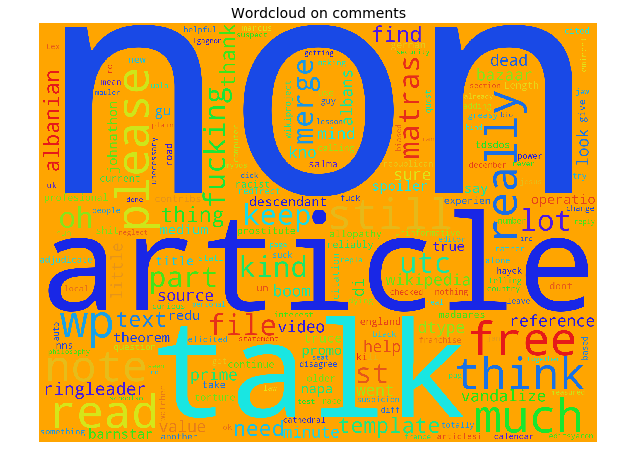

In [37]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
#Stopwords = set(stopwords.words('english'))



wordcloud = WordCloud(
                      background_color='orange',
                      width=2000,
                      height=1500).generate(str(data_train['data']))
plt.figure(1,figsize=(10, 10))
plt.title('Wordcloud on comments',fontsize = 14)
plt.imshow(wordcloud)
plt.axis('off')


In [15]:
data = data_train[data_train['toxic'] ==1 ]

In [16]:
train_words = TfidfVectorizer(ngram_range=(1, 2),analyzer='word',strip_accents='unicode',lowercase=None,
                              sublinear_tf=True,min_df=150)
    

In [17]:
train_words.fit(data['data'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=None, max_df=1.0, max_features=None, min_df=150,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [371]:
tfidf_words = pd.DataFrame(train_words.transform(data_train['data']).todense(),columns=train_words.get_feature_names())

In [372]:
tfidf_words.shape

(50000, 50)

In [373]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=.01 )
def funs(data):
    tvec_weights = tvec.fit_transform(data)
    weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
    terms = weights_df.sort_values(by='weight', ascending=False).head(20)
    
    return terms

In [374]:
toxic_weigts = funs(data['data'])

In [376]:
data = data_train[data_train['severe_toxic'] == 1]
severe_toxic_weigts = funs(data['data'])

In [378]:
data = data_train[data_train['obscene'] == 1]
obscene_weigts = funs(data['data'])

In [380]:

data = data_train[data_train['threat'] == 1]
threat_weigts = funs(data['data'])

In [382]:
data = data_train[data_train['insult'] == 1]
insult_weigts = funs(data['data'])

In [383]:
data = data_train[data_train['identity_hate'] == 1]
identity_hate_weigts = funs(data['data'])

In [384]:
data = data_train[data_train['sum'] == 'clean']
clean = funs(data['data'])

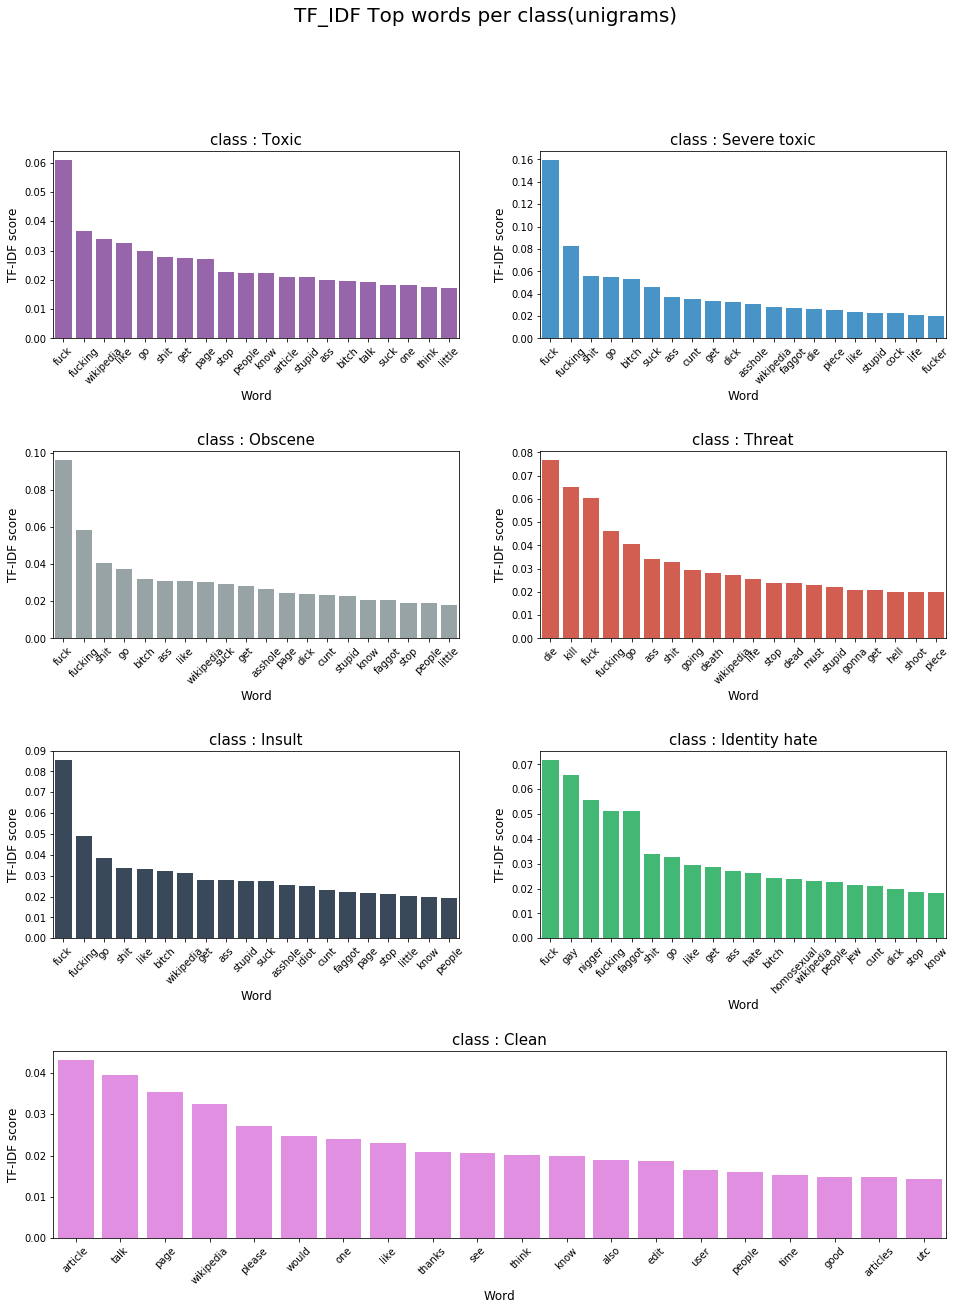

In [385]:
plt.figure(figsize=(16,20))
plt.suptitle("TF_IDF Top words per class(unigrams)",fontsize=20)

plt.subplots_adjust(hspace=0.6)
plt.subplot2grid((4,2),(0,0))
sns.barplot(toxic_weigts['term'],toxic_weigts['weight'],color="#9b59b6")
plt.title("class : Toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(0,1))
sns.barplot(severe_toxic_weigts['term'],severe_toxic_weigts['weight'],color =  "#3498db")
plt.title("class : Severe toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(1,0))
sns.barplot(obscene_weigts['term'],obscene_weigts['weight'],color = "#95a5a6")
plt.title("class : Obscene",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(1,1))
sns.barplot(threat_weigts['term'],threat_weigts['weight'],color = "#e74c3c")
plt.title("class : Threat",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(2,0))
sns.barplot(insult_weigts['term'],insult_weigts['weight'],color =  "#34495e")
plt.title("class : Insult",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(2,1))
sns.barplot(identity_hate_weigts['term'],identity_hate_weigts['weight'],color = "#2ecc71")
plt.title("class : Identity hate",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(3,0),colspan=2)
sns.barplot(clean['term'],clean['weight'],color = 'violet')
plt.title("class : Clean",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.show()

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=.01 , ngram_range=(2,2))
def funs(data):
    tvec_weights = tvec.fit_transform(data)
    weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
    terms = weights_df.sort_values(by='weight', ascending=False).head(5)
    
    return terms


In [54]:
data = data_train[data_train['toxic'] == 1]
toxic_weigts = funs(data['data'])

In [55]:
data = data_train[data_train['severe_toxic'] == 1]
severe_toxic_weigts = funs(data['data'])

In [56]:
data = data_train[data_train['obscene'] == 1]
obscene_weigts = funs(data['data'])

In [57]:
data = data_train[data_train['threat'] == 1]
threat_weigts = funs(data['data'])

In [58]:
data = data_train[data_train['insult'] == 1]
insult_weigts = funs(data['data'])

In [59]:
data = data_train[data_train['identity_hate'] == 1]
identity_hate_weigts = funs(data['data'])

In [60]:
data = data_train[data_train['sum'] == 'clean']
clean = funs(data['data'])

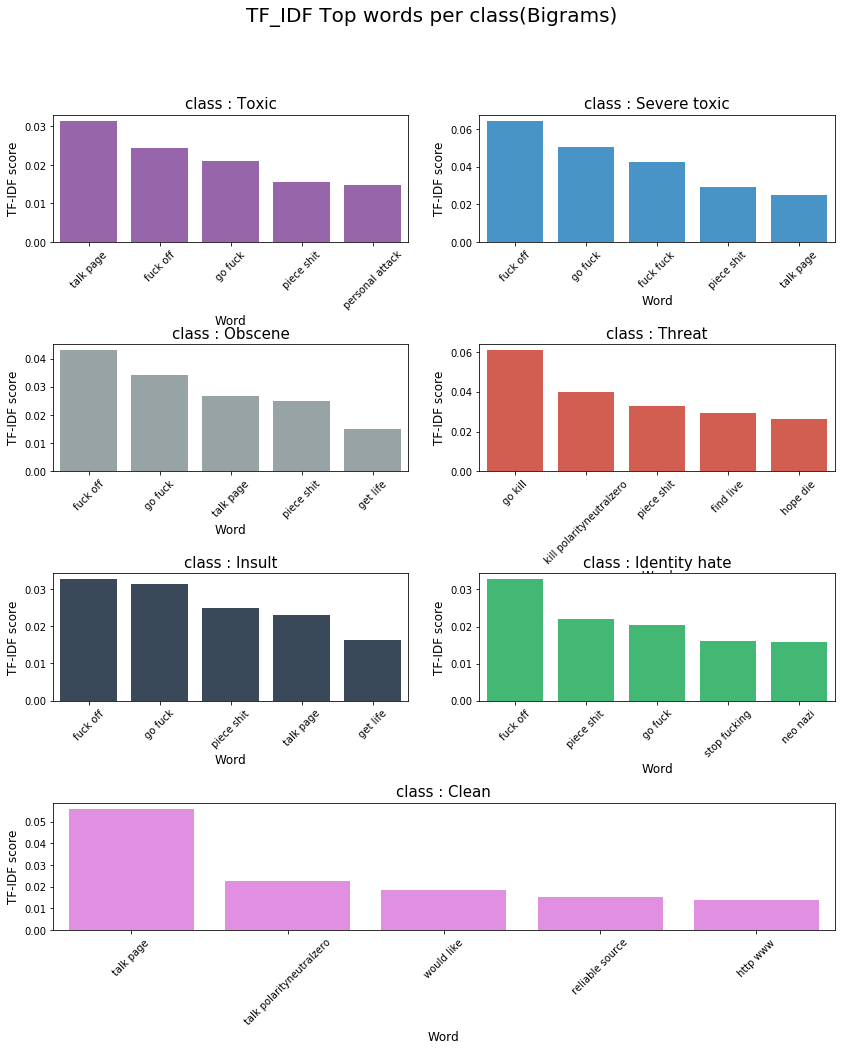

In [69]:
plt.figure(figsize=(14,15))
plt.suptitle("TF_IDF Top words per class(Bigrams)",fontsize=20)

plt.subplots_adjust(hspace=0.8)
plt.subplot2grid((4,2),(0,0))
sns.barplot(toxic_weigts['term'],toxic_weigts['weight'],color="#9b59b6")
plt.title("class : Toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(0,1))
sns.barplot(severe_toxic_weigts['term'],severe_toxic_weigts['weight'],color =  "#3498db")
plt.title("class : Severe toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(1,0))
sns.barplot(obscene_weigts['term'],obscene_weigts['weight'],color = "#95a5a6")
plt.title("class : Obscene",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(1,1))
sns.barplot(threat_weigts['term'],threat_weigts['weight'],color = "#e74c3c")
plt.title("class : Threat",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(2,0))
sns.barplot(insult_weigts['term'],insult_weigts['weight'],color =  "#34495e")
plt.title("class : Insult",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(2,1))
sns.barplot(identity_hate_weigts['term'],identity_hate_weigts['weight'],color = "#2ecc71")
plt.title("class : Identity hate",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(3,0),colspan=2)
sns.barplot(clean['term'],clean['weight'],color = 'violet')
plt.title("class : Clean",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)
plt.xticks(rotation = 45)

plt.show()

In [37]:
unigram = TfidfVectorizer(ngram_range=(1, 2),analyzer='word',strip_accents='unicode',lowercase=None,
                                          sublinear_tf=True,min_df=30,max_features=30000)


In [38]:
unigram.fit(data_train['data'])
unigram_words = pd.DataFrame(unigram.transform(data_train['data']).todense(),columns=unigram.get_feature_names())

In [97]:
unigram_words.shape

(30000, 4629)

In [39]:
from sklearn.preprocessing import Normalizer
n = Normalizer()

In [40]:
data_train[feature_columns] = n.fit_transform(data_train[feature_columns])

In [41]:
train = np.hstack([unigram_words,data_train[feature_columns]])

In [46]:
#train = pd.concat([unigram_words,data_train[feature_columns]],axis = 0)

In [42]:
TARGET_COLS = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train,data_train[TARGET_COLS],train_size = 0.8,test_size = 0.2)

In [75]:
from skmultilearn.problem_transform import BinaryRelevance

from sklearn.linear_model import LogisticRegression

#classifier = BinaryRelevance(LogisticRegression(C = 3))

#classifier.fit(X_train, Y_train)

# predict
#predictions = classifier.predict(X_test)

#from sklearn.metrics import accuracy_score
#accuracy_score(Y_test,predictions)

In [69]:
from sklearn.metrics import roc_auc_score
pred = classifier.predict_proba(X_test)
pred = pred.toarray()
roc_auc_score(Y_test,pred)

0.9603057632558406

In [44]:
from sklearn.metrics import log_loss

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [172]:
scores = []
#pred ={}
#pred1 = {}
#importance ={}
for class_name in TARGET_COLS:
    train_target = Y_train[class_name]
    classifier = LogisticRegression(C = 1.6)    

    cv_score = np.mean(cross_val_score(classifier, X_train, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))
    

    #classifier.fit(X_train, train_target)
    #importance[class_name] = classifier.coef_
    #pred[class_name] = classifier.predict_proba(X_test)[:, 1]
    #pred1[class_name]= classifier.predict(X_test)
print('Total CV score is {}'.format(np.mean(scores)))

CV score for class toxic is 0.9552995962730035
CV score for class severe_toxic is 0.9765256480551671
CV score for class obscene is 0.9722173458370275
CV score for class threat is 0.964334243182628
CV score for class insult is 0.9626681615087863
CV score for class identity_hate is 0.9635101701019115
Total CV score is 0.965759194159754


In [130]:
x = importance['identity_hate']

In [131]:
#x = importance['identity_hate']

In [132]:
y =[]
for i in x:
    for c in i:
        y.append(c)

In [62]:
word = unigram.get_feature_names()
word.extend(['data_capital','data_puctuations','data_quationmark','data_exclamation_marks','new_symbols','unique_word_percentage',
'sentence','stop_words'])

In [134]:
data = pd.DataFrame({'a': word, 'b': y})
data = data[data['b']>2]
#data1 = data.sort_values(by ='b',ascending=False)
#data2 = data.sort_values(by ='b',ascending=False)
#data3 = data.sort_values(by ='b',ascending=False)
#data4 = data.sort_values(by ='b',ascending=False)
#data5 = data.sort_values(by ='b',ascending=False)
#data6 = data.sort_values(by ='b',ascending=False)
#list_toxic = list(data['a'])
#list_toxic.extend(data['a'])

In [137]:
data1 = data1[0:10]
data2 = data2[0:10]
data3 = data3[0:10]
data4 = data4[0:10]
data5 = data5[0:10]
data6 = data6[0:10]

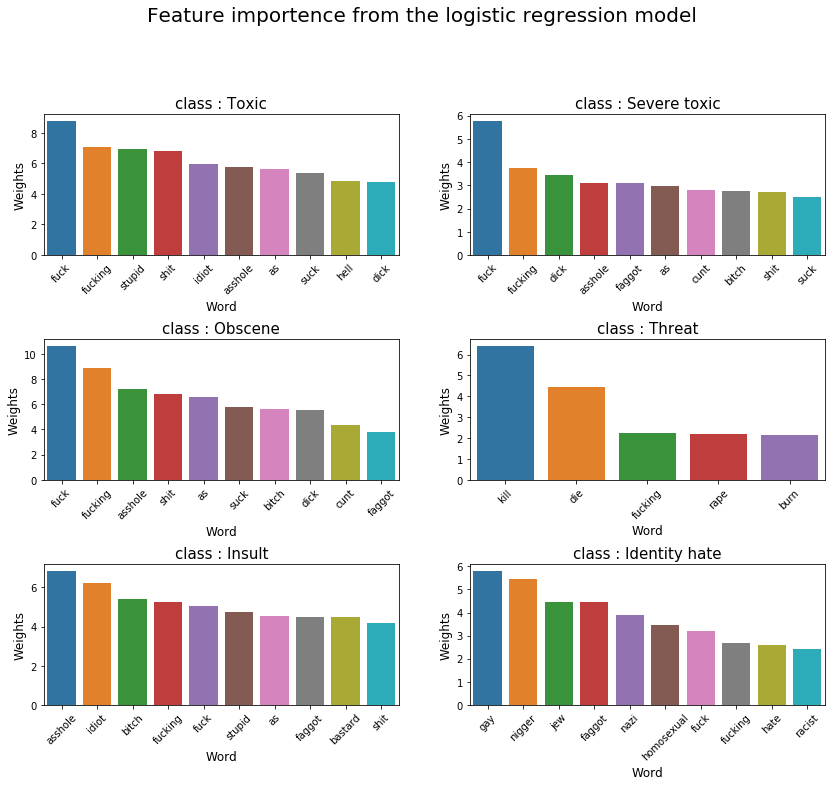

In [138]:
plt.figure(figsize=(14,15))
plt.suptitle("Feature importence from the logistic regression model",fontsize=20)

plt.subplots_adjust(hspace=0.6)
plt.subplot2grid((4,2),(0,0))
sns.barplot(data1['a'],data1['b'])
plt.title("class : Toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(0,1))
sns.barplot(data2['a'],data2['b'])
plt.title("class : Severe toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(1,0))
sns.barplot(data3['a'],data3['b'])
plt.title("class : Obscene",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(1,1))
sns.barplot(data4['a'],data4['b'])
plt.title("class : Threat",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(2,0))
sns.barplot(data5['a'],data5['b'])
plt.title("class : Insult",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 45)

plt.subplot2grid((4,2),(2,1))
sns.barplot(data6['a'],data6['b'])
plt.title("class : Identity hate",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

In [149]:
pred2 = pd.DataFrame.from_dict(pred)

In [150]:
pred2 =pred2[pred2.columns[::-1]]

In [151]:
from sklearn.metrics import roc_auc_score

In [152]:
roc_auc_score(Y_test,pred2)

0.9556406154593704

In [154]:
pred3 = pd.DataFrame.from_dict(pred1)

In [155]:
pred3 =pred3[pred3.columns[::-1]]

In [56]:
from sklearn.metrics import confusion_matrix

In [159]:
con_toxic_logsitic = confusion_matrix(Y_test['toxic'],pred3['toxic'])
con_toxic_logsitic

array([[5421,   27],
       [ 235,  317]], dtype=int64)

In [167]:
con_toxic_logsitic = confusion_matrix(Y_test['severe_toxic'],pred3['severe_toxic'])
con_toxic_logsitic

array([[5927,    9],
       [  51,   13]], dtype=int64)

In [168]:
con_toxic_logsitic = confusion_matrix(Y_test['obscene'],pred3['obscene'])
con_toxic_logsitic

array([[5661,   11],
       [ 137,  191]], dtype=int64)

In [169]:
con_toxic_logsitic = confusion_matrix(Y_test['threat'],pred3['threat'])
con_toxic_logsitic

array([[5978,    0],
       [  22,    0]], dtype=int64)

In [170]:
con_toxic_logsitic = confusion_matrix(Y_test['insult'],pred3['insult'])
con_toxic_logsitic

array([[5681,   26],
       [ 144,  149]], dtype=int64)

In [171]:
con_toxic_logsitic = confusion_matrix(Y_test['identity_hate'],pred3['identity_hate'])
con_toxic_logsitic

array([[5942,    4],
       [  49,    5]], dtype=int64)

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
scores = []
pred4 ={}
pred5 = {}
importance ={}
for class_name in TARGET_COLS:
    train_target = Y_train[class_name]
    classifier = MultinomialNB(alpha=0.2)    

    cv_score = np.mean(cross_val_score(classifier, X_train, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))
    

    classifier.fit(X_train, train_target)
    pred4[class_name] = classifier.predict_proba(X_test)[:, 1]
    pred5[class_name]= classifier.predict(X_test)
    importance[class_name] = classifier.coef_
print('Total CV score is {}'.format(np.mean(scores)))

CV score for class toxic is 0.9479063535710476
CV score for class severe_toxic is 0.965157078991728
CV score for class obscene is 0.9603215865122509
CV score for class threat is 0.9214174480477572
CV score for class insult is 0.9571980699886486
CV score for class identity_hate is 0.9377839265674216
Total CV score is 0.9482974106131422


In [254]:
classifier.feature_count_

array([[1.43384627e+01, 5.10096741e+01, 7.54713863e+00, ...,
        2.10593887e+04, 7.37066709e+02, 5.97416007e+03],
       [0.00000000e+00, 0.00000000e+00, 1.56200816e-01, ...,
        2.13202202e+02, 7.42866550e+00, 3.86488231e+01]])

In [213]:
pred2 = pd.DataFrame.from_dict(pred4)
pred2 =pred2[pred2.columns[::-1]]
roc_auc_score(Y_test,pred2)
pred3 = pd.DataFrame.from_dict(pred5)
pred3 =pred3[pred3.columns[::-1]]

In [214]:
#pred2 =pred2[pred2.columns[::-1]]
roc_auc_score(Y_test,pred2)

0.943893272365683

In [215]:
con_toxic_logsitic = confusion_matrix(Y_test['toxic'],pred3['toxic'])
con_toxic_logsitic

array([[5408,   40],
       [ 243,  309]], dtype=int64)

In [216]:
con_toxic_logsitic = confusion_matrix(Y_test['severe_toxic'],pred3['severe_toxic'])
con_toxic_logsitic

array([[5925,   11],
       [  48,   16]], dtype=int64)

In [217]:
con_toxic_logsitic = confusion_matrix(Y_test['obscene'],pred3['obscene'])
con_toxic_logsitic

array([[5650,   22],
       [ 137,  191]], dtype=int64)

In [218]:
con_toxic_logsitic = confusion_matrix(Y_test['threat'],pred3['threat'])
con_toxic_logsitic

array([[5978,    0],
       [  22,    0]], dtype=int64)

In [219]:
con_toxic_logsitic = confusion_matrix(Y_test['insult'],pred3['insult'])
con_toxic_logsitic

array([[5668,   39],
       [ 136,  157]], dtype=int64)

In [220]:
con_toxic_logsitic = confusion_matrix(Y_test['identity_hate'],pred3['identity_hate'])
con_toxic_logsitic

array([[5941,    5],
       [  50,    4]], dtype=int64)

In [102]:
x = importance['identity_hate']

In [103]:
y =[]
for i in x:
    for c in i:
        y.append(c)

In [104]:
data = pd.DataFrame({'a': word, 'b': y})
#data = data[data['b']>2]

In [105]:
#data1 = data.sort_values(by ='b',ascending=False)
#data2 = data.sort_values(by ='b',ascending=False)
#data3 = data.sort_values(by ='b',ascending=False)
#data4 = data.sort_values(by ='b',ascending=False)
#data5 = data.sort_values(by ='b',ascending=False)
#data6 = data.sort_values(by ='b',ascending=False)
#list_toxic = list(data['a'])
#list_toxic.extend(data['a'])

In [115]:
data1 = data1[0:5]
data2 = data2[0:5]
data3 = data3[0:5]
data4 = data4[0:5]
data5 = data5[0:5]
data6 = data6[0:5]

In [117]:
data1['b'] = -data1['b']
data2['b'] = -data2['b']
data3['b'] = -data3['b']
data4['b'] = -data4['b']
data5['b'] = -data5['b']
data6['b'] = -data6['b']

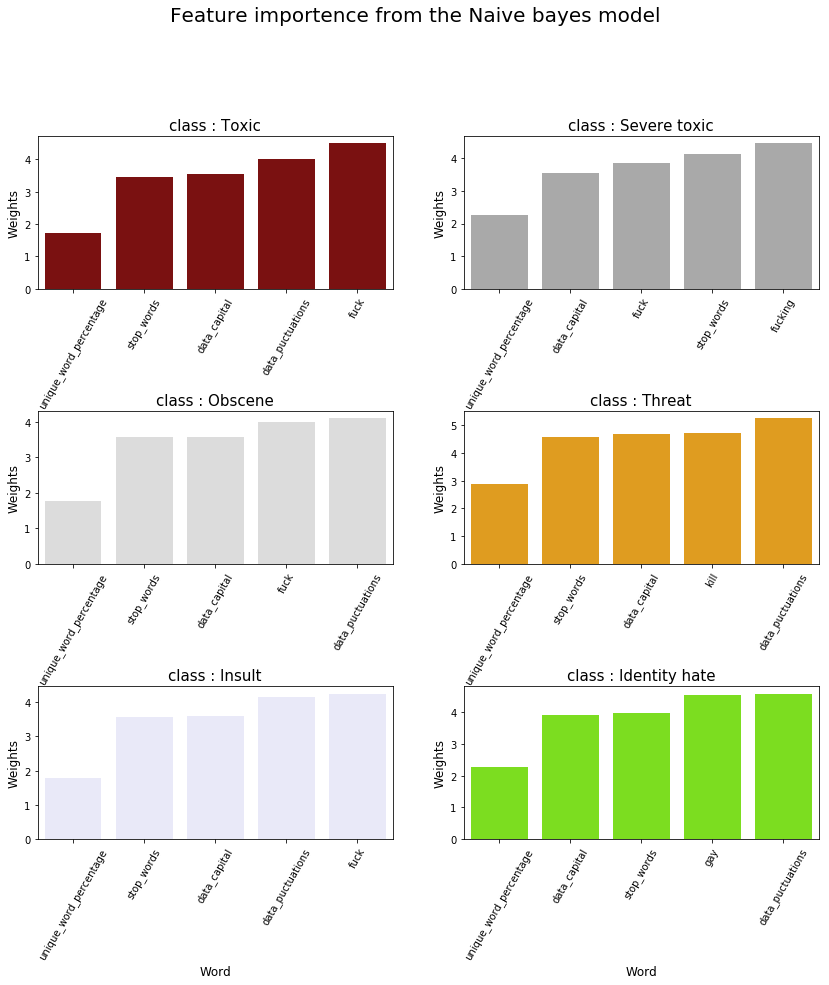

In [118]:
plt.figure(figsize=(14,18))
plt.suptitle("Feature importence from the Naive bayes model",fontsize=20)

plt.subplots_adjust(hspace=0.8)
plt.subplot2grid((4,2),(0,0))
sns.barplot(data1['a'],data1['b'],color = '#8B0000')
plt.title("class : Toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 60)

plt.subplot2grid((4,2),(0,1))
sns.barplot(data2['a'],data2['b'],color = '#A9A9A9')
plt.title("class : Severe toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 60)

plt.subplot2grid((4,2),(1,0))
sns.barplot(data3['a'],data3['b'],color = '#DCDCDC')
plt.title("class : Obscene",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 60)

plt.subplot2grid((4,2),(1,1))
sns.barplot(data4['a'],data4['b'],color = 'orange')
plt.title("class : Threat",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 60)

plt.subplot2grid((4,2),(2,0))
sns.barplot(data5['a'],data5['b'],color = '#E6E6FA')
plt.title("class : Insult",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 60)

plt.subplot2grid((4,2),(2,1))
sns.barplot(data6['a'],data6['b'],color = '#7CFC00')
plt.title("class : Identity hate",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.xticks(rotation = 60)
plt.show()

{}